In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/rna_10xpmbc_3k',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7']

In [3]:
sys.path.insert(1,'/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/')
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/rna_10xpmbc_3k',
 '/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip']

In [4]:
import simba as si
import os
si.__path__

['/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/simba']

In [5]:
workdir = 'result_10xpbmc_rna_variable_genes'
si.settings.set_workdir(workdir)

Saving results in: result_10xpmbc_rna_variable_genes


In [6]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [7]:
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

## preprocessing

In [8]:
adata_CG = si.read_h5ad("./input/data_processed/rna/rna_seq.h5ad")

In [9]:
adata_CG

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'celltype'
    var: 'gene_ids'

In [10]:
# si.pp.filter_cells_rna(adata,min_n_genes=100)
si.pp.filter_genes(adata_CG,min_n_cells=3)

Before filtering: 
2700 cells, 32738 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2700 cells, 13714 genes


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [11]:
si.pp.cal_qc_rna(adata_CG)

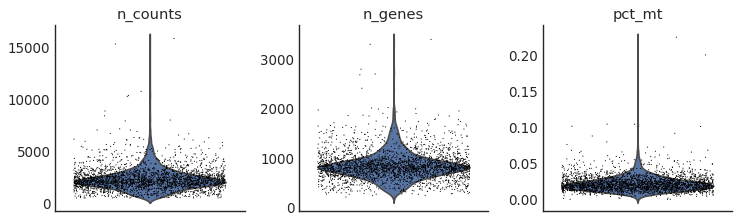

In [12]:
si.pl.violin(adata_CG,list_obs=['n_counts','n_genes','pct_mt'])

In [13]:
si.pp.normalize(adata_CG,method='lib_size')

In [14]:
si.pp.log_transform(adata_CG)

In [15]:
si.pp.select_variable_genes(adata_CG)

2000 variable genes are selected.


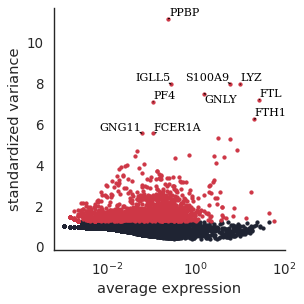

In [16]:
si.pl.variable_genes(adata_CG,show_texts=True)

In [17]:
si.pl.variable_genes(adata_CG,show_texts=False, save_fig=True)

### discretize RNA expression

In [17]:
si.tl.discretize(adata_CG,n_bins=5)

[0.48992336 1.5519998  2.1158605  2.934613   3.9790492  7.4695992 ]


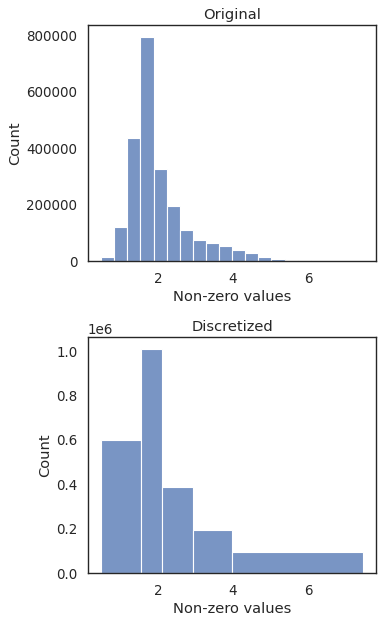

In [18]:
si.pl.discretize(adata_CG,kde=False)

## Generate Graph

In [19]:
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                dirname='graph0')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


relation0: source: C, destination: G
#edges: 140890
relation1: source: C, destination: G
#edges: 237469
relation2: source: C, destination: G
#edges: 83413
relation3: source: C, destination: G
#edges: 29416
relation4: source: C, destination: G
#edges: 18242
Total number of edges: 509430
Writing graph file "pbg_graph.txt" to "result_10xpmbc_rna_variable_genes/pbg/graph0" ...
Finished.


## PBG training

In [20]:
si.settings.pbg_params

{'entity_path': 'result_10xpmbc_rna_variable_genes/pbg/graph0/input/entity',
 'edge_paths': ['result_10xpmbc_rna_variable_genes/pbg/graph0/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1}, 'G': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'G',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0}],
 'dynamic_relations': False,
 'dimension': 50,
 'global_emb': False,
 'comparator': 'dot',
 'num_epochs': 10,
 'workers': 12,
 'num_batch_negs': 50,
 'num_uniform_negs': 50,
 'loss_fn': 'softmax',
 'lr': 0.1,
 'early_stopping': False,
 'regularization_coef': 0.0,
 'wd': 0.0,
 'wd_interval': 50,
 'eval_fraction': 0.05,
 'eval_num_batch_negs

In [21]:
dict_config = si.settings.pbg_params.copy()
## start training
dict_config['wd_interval'] = 10
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, output='model')

Auto-estimated weight decay is 0.069558
Converting input data ...
[2021-06-01 15:34:50.951748] Using the 5 relation types given in the config
[2021-06-01 15:34:50.952361] Searching for the entities in the edge files...
[2021-06-01 15:34:51.635967] Entity type C:
[2021-06-01 15:34:51.637084] - Found 2700 entities
[2021-06-01 15:34:51.637538] - Removing the ones with fewer than 1 occurrences...
[2021-06-01 15:34:51.638312] - Left with 2700 entities
[2021-06-01 15:34:51.638740] - Shuffling them...
[2021-06-01 15:34:51.641145] Entity type G:
[2021-06-01 15:34:51.642112] - Found 2000 entities
[2021-06-01 15:34:51.642645] - Removing the ones with fewer than 1 occurrences...
[2021-06-01 15:34:51.643398] - Left with 2000 entities
[2021-06-01 15:34:51.643835] - Shuffling them...
[2021-06-01 15:34:51.645782] Preparing counts and dictionaries for entities and relation types:
[2021-06-01 15:34:51.667760] - Writing count of entity type C and partition 0
[2021-06-01 15:34:51.680492] - Writing count 

In [22]:
si.settings.pbg_params = dict_config.copy()

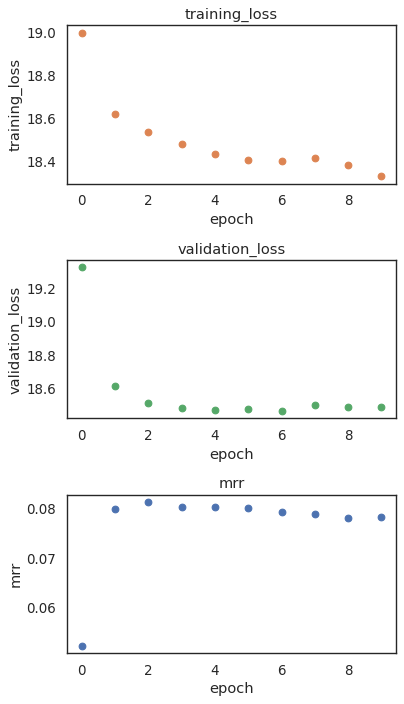

In [23]:
si.pl.pbg_metrics(fig_ncol=1)

In [24]:
si.pl.pbg_metrics(fig_ncol=1,save_fig=True,fig_name='graph0_model.pdf')

## Post-training Analysis

In [25]:
dict_adata = si.read_embedding()

In [26]:
dict_adata

{'C': AnnData object with n_obs × n_vars = 2700 × 50,
 'G': AnnData object with n_obs × n_vars = 2000 × 50}

In [27]:
adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes

In [28]:
adata_C

AnnData object with n_obs × n_vars = 2700 × 50

In [29]:
adata_G

AnnData object with n_obs × n_vars = 2000 × 50

In [30]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e', 
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#8c564b',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#b5bd61'}

### visualize embeddings of cells

In [31]:
## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()

In [32]:
adata_C

AnnData object with n_obs × n_vars = 2700 × 50
    obs: 'celltype'

In [33]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

In [34]:
adata_C

AnnData object with n_obs × n_vars = 2700 × 50
    obs: 'celltype'
    obsm: 'X_umap'

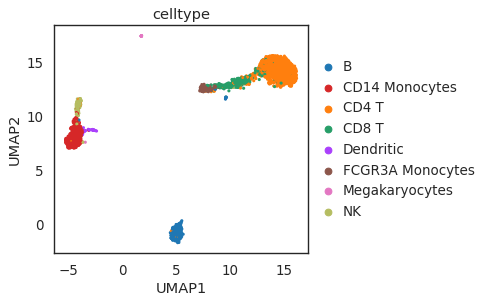

In [35]:
si.pl.umap(adata_C,color=['celltype'],dict_palette={'celltype': palette_celltype},fig_size=(6,4),
           drawing_order='random')

In [36]:
si.pl.umap(adata_C,color=['celltype'],dict_palette={'celltype': palette_celltype},fig_size=(6,4),
           drawing_order='random',
           save_fig=True,
           fig_name='umap_graph0_model.pdf')

### visualize embeddings of cells and genes

#### SIMBA embed genes into the same UMAP space

In [37]:
adata_all = si.tl.embed(adata_ref=adata_C,list_adata_query=[adata_G])

Performing softmax transformation for query data 0;


In [38]:
adata_all.obs

,celltype,id_dataset
ACGATGACTGGTCA-1,CD4 T,ref
GCCGGAACGAACTC-1,CD8 T,ref
AACCTTTGGACGGA-1,CD4 T,ref
GGGAACGACACAAC-1,B,ref
TGCAAGTGAGAACA-1,CD4 T,ref
...,...,...
ZNF3,NaN,query_0
TOP2A,NaN,query_0
YPEL3,NaN,query_0
RP11-314N13.3,NaN,query_0


In [39]:
## add annotations of cells and genes
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'celltype']
adata_all.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'

In [40]:
adata_all.obs

,celltype,id_dataset,entity_anno
ACGATGACTGGTCA-1,CD4 T,ref,CD4 T
GCCGGAACGAACTC-1,CD8 T,ref,CD8 T
AACCTTTGGACGGA-1,CD4 T,ref,CD4 T
GGGAACGACACAAC-1,B,ref,B
TGCAAGTGAGAACA-1,CD4 T,ref,CD4 T
...,...,...,...
ZNF3,NaN,query_0,gene
TOP2A,NaN,query_0,gene
YPEL3,NaN,query_0,gene
RP11-314N13.3,NaN,query_0,gene


In [41]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)

In [43]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"

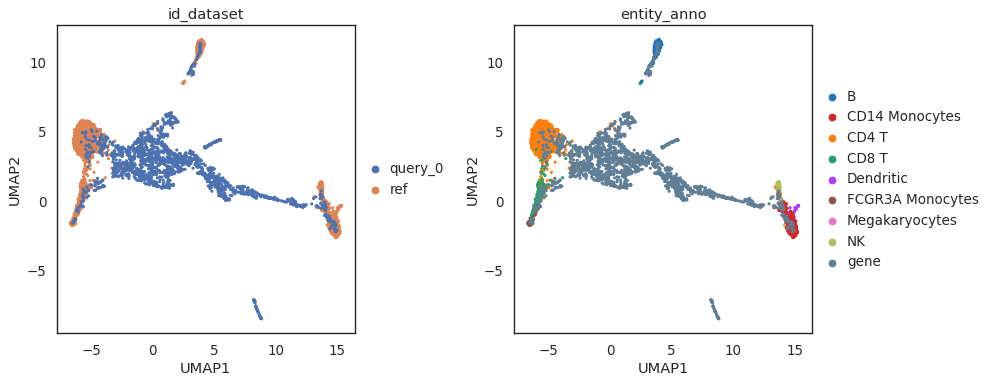

In [44]:
si.pl.umap(adata_all,color=['id_dataset','entity_anno'],dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           fig_size=(6,5))

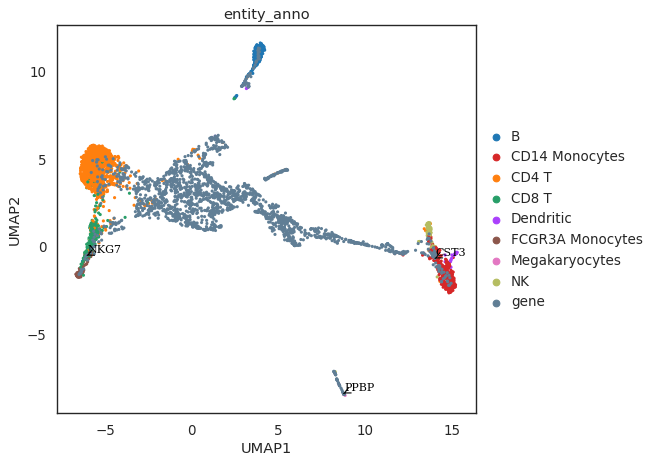

In [45]:
si.pl.umap(adata_all,color=['entity_anno'],dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           texts=['CST3', 'NKG7', 'PPBP'],
           show_texts=True,
           fig_size=(8,6))

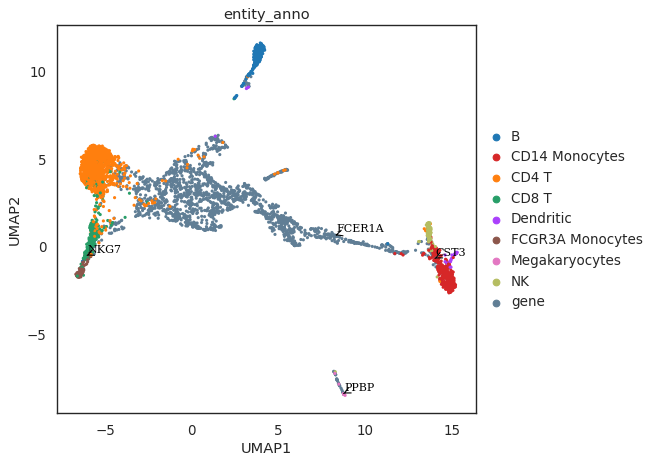

In [46]:
si.pl.umap(adata_all[::-1,],color=['entity_anno'],dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           texts=['CST3', 'NKG7', 'PPBP','FCER1A'],
           show_texts=True,
           fig_size=(8,6))

#### Other ways to explore entities

In [47]:
adata_cmp = si.tl.compare_entities(adata_ref=adata_C, adata_query=adata_G)

In [48]:
adata_cmp

AnnData object with n_obs × n_vars = 2700 × 2000
    obs: 'celltype'
    var: 'max', 'std', 'gini', 'entropy'
    layers: 'norm', 'softmax'

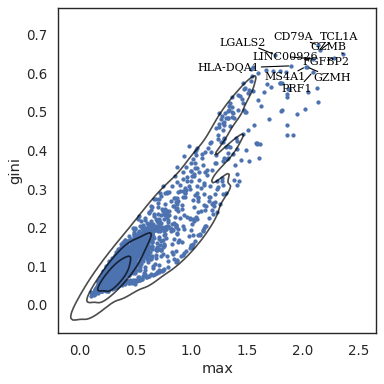

In [49]:
si.pl.entity_metrics(adata_cmp,x='max',y='gini',
                     show_texts=True,show_cutoff=False,
                     cutoff_x=1.5,cutoff_y=8.5)

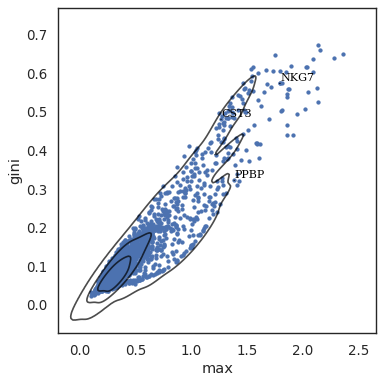

In [50]:
si.pl.entity_metrics(adata_cmp,x='max',y='gini',
                     texts=['CST3', 'NKG7', 'PPBP'],
                     show_texts=True,show_cutoff=False,
                     cutoff_x=1.5,cutoff_y=8.5)

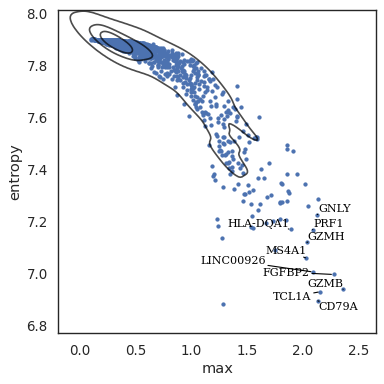

In [51]:
si.pl.entity_metrics(adata_cmp,x='max',y='entropy',
                     show_texts=True,show_cutoff=False,
                     cutoff_x=1.5,cutoff_y=8.5)

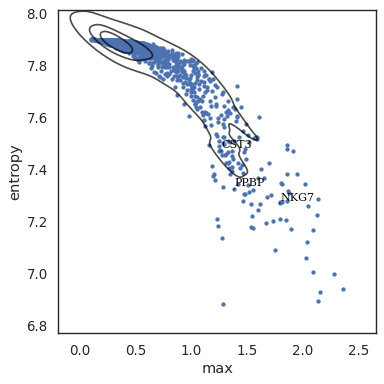

In [52]:
si.pl.entity_metrics(adata_cmp,x='max',y='entropy',
                     texts=['CST3', 'NKG7', 'PPBP'],
                     show_texts=True,show_cutoff=False,
                     cutoff_x=1.5,cutoff_y=8.5)

In [53]:
adata_cmp.obs['celltype'] = adata_CG.obs.loc[adata_cmp.obs_names,'celltype']

In [54]:
entities = ['CST3', 'NKG7', 'PPBP']

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


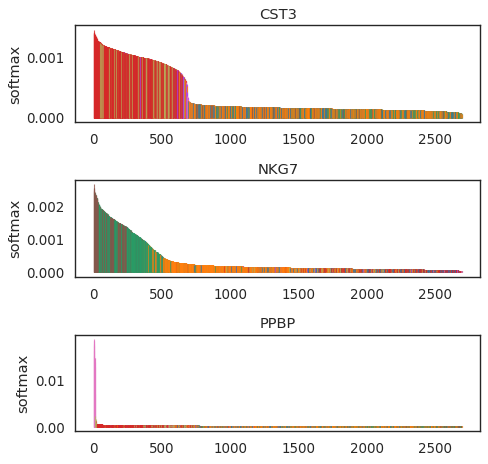

In [55]:
si.pl.entity_barcode(adata_cmp, 
                     layer='softmax',
                     entities=entities, 
                     anno_ref='celltype',
                     palette=palette_celltype)

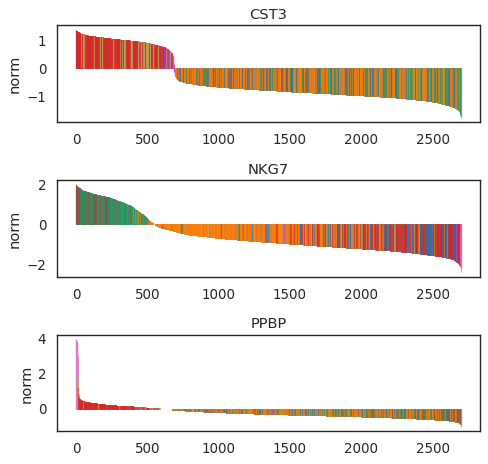

In [56]:
si.pl.entity_barcode(adata_cmp, 
                     layer='norm',
                     entities=entities, 
                     anno_ref='celltype',
                     palette=palette_celltype)

In [57]:
adata_CG.write(os.path.join(workdir, 'adata_CG.h5ad'))
adata_C.write(os.path.join(workdir, 'adata_C.h5ad'))
adata_G.write(os.path.join(workdir, 'adata_G.h5ad'))

adata_all.write(os.path.join(workdir, 'adata_all.h5ad'))
adata_cmp.write(os.path.join(workdir, 'adata_cmp.h5ad'))

... storing 'pbg_id' as categorical
... storing 'celltype' as categorical
... storing 'id_dataset' as categorical
... storing 'entity_anno' as categorical
